<h2>Import Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
event = pd.read_csv('event_type.csv')
log = pd.read_csv('log_feature.csv')
resource = pd.read_csv('resource_type.csv')
severity = pd.read_csv('severity_type.csv')
train = pd.read_csv('train.csv')

In [3]:
data = event.merge(log, on='id')
data = data.merge(resource, on='id')
data = data.merge(severity, on='id')
data = data.merge(train, on='id')
data.sample(15)

,id,event_type,log_feature,volume,resource_type,severity_type,location,fault_severity
35133,10698,event_type 14,feature 162,2,resource_type 4,severity_type 1,location 607,0
44647,12613,event_type 11,feature 134,1,resource_type 8,severity_type 1,location 757,0
60713,12153,event_type 11,feature 203,6,resource_type 8,severity_type 1,location 976,1
52710,1184,event_type 23,feature 54,4,resource_type 2,severity_type 1,location 851,0
7142,16916,event_type 11,feature 203,12,resource_type 8,severity_type 1,location 1107,2
4942,15976,event_type 13,feature 273,1,resource_type 6,severity_type 1,location 1091,0
19002,12930,event_type 35,feature 307,1,resource_type 2,severity_type 2,location 300,1
16862,1003,event_type 35,feature 232,12,resource_type 2,severity_type 2,location 244,0
23659,447,event_type 35,feature 134,1,resource_type 2,severity_type 1,location 446,0
15000,10074,event_type 35,feature 301,1,resource_type 2,severity_type 1,location 211,1


In [4]:
data.isnull().sum()

id                0
event_type        0
log_feature       0
volume            0
resource_type     0
severity_type     0
location          0
fault_severity    0
dtype: int64

In [5]:
data.shape

(61839, 8)

In [6]:
data.duplicated().sum()

0

<h2>Data Visulation</h2>

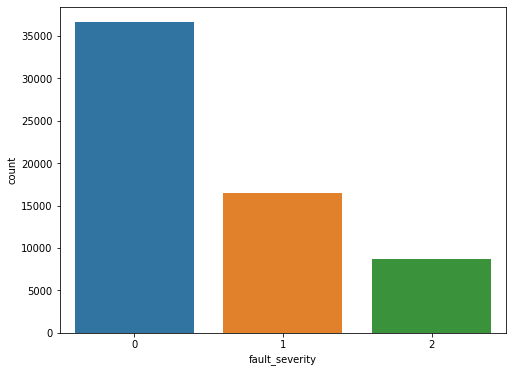

In [7]:
plt.figure(figsize = (8,6))
sns.countplot(data['fault_severity']) #arıza şiddeti
plt.show()

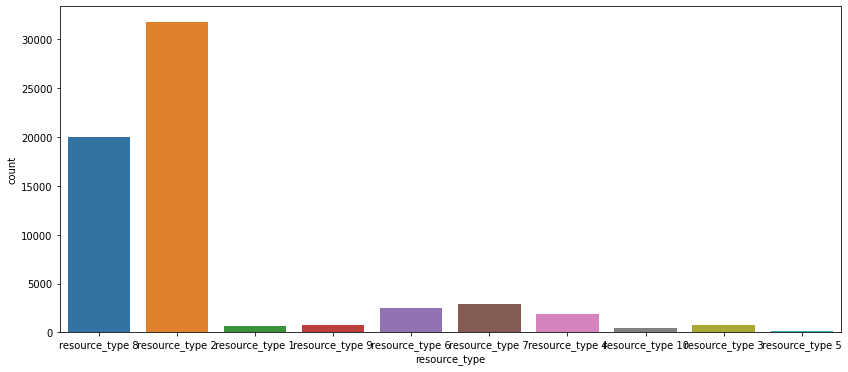

In [8]:
plt.figure(figsize = (14,6))
sns.countplot(data['resource_type']) #kaynak tipi
plt.show()

<h2>Clean Data</h2>

In [9]:
data.replace({"event_type ": "", "resource_type ": "", "severity_type ":"", "location": "" ,"feature ":""}, regex=True, inplace=True)
data.head()

,id,event_type,log_feature,volume,resource_type,severity_type,location,fault_severity
0,8011,15,68,7,8,2,1,0
1,2588,15,82,9,8,1,1,0
2,2588,15,201,5,8,1,1,0
3,2588,15,80,15,8,1,1,0
4,2588,15,203,5,8,1,1,0


<h2>Data Manipulation</h2>

In [18]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,id,volume,fault_severity,event_type_10,event_type_11,event_type_12,event_type_13,event_type_14,event_type_15,event_type_18,...,location_ 987,location_ 989,location_ 99,location_ 990,location_ 991,location_ 994,location_ 995,location_ 996,location_ 998,location_ 999
0,8011,7,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2588,9,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2588,5,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2588,15,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2588,5,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data.drop('fault_severity', axis=1, inplace=True)

In [20]:
df = data.groupby('id').sum()

In [21]:
df.shape

(7381, 1320)

In [22]:
df.reset_index(inplace=True)
df.head()

,id,volume,event_type_10,event_type_11,event_type_12,event_type_13,event_type_14,event_type_15,event_type_18,event_type_19,...,location_ 987,location_ 989,location_ 99,location_ 990,location_ 991,location_ 994,location_ 995,location_ 996,location_ 998,location_ 999
0,1,20,0.0,6.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df = df.merge(train,on='id',how='inner')

In [24]:
df.drop('location', axis=1, inplace=True)
df.head()

,id,volume,event_type_10,event_type_11,event_type_12,event_type_13,event_type_14,event_type_15,event_type_18,event_type_19,...,location_ 989,location_ 99,location_ 990,location_ 991,location_ 994,location_ 995,location_ 996,location_ 998,location_ 999,fault_severity
0,1,20,0.0,6.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,5,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,8,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,13,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


<h2>Classifition Model</h2>

In [25]:
y = df.fault_severity
X = df.drop('fault_severity', axis=1)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

In [27]:
model = GradientBoostingClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [28]:
# Gradient Boosting
pred = model.predict(X_test)
print(accuracy_score(pred, y_test))

0.7404063205417607


In [29]:
prediction = model.predict_proba(X_test)

In [30]:
result = pd.DataFrame({
        "id": X_test.id,
        "Predicted": pred,
        "prediction 0": prediction[:,0],
        "prediction 1": prediction[:,1],
        "prediction 2": prediction[:,2]
    },
    columns=['id','Predicted','prediction 0','prediction 1','prediction 2'])

result.head()

,id,Predicted,prediction 0,prediction 1,prediction 2
3546,8892,0,0.809062,0.182911,0.008027
7356,18490,0,0.833859,0.137660,0.028481
3282,8215,0,0.894484,0.087577,0.017939
4393,11003,0,0.960294,0.033737,0.005969
416,1064,2,0.281516,0.343343,0.375141


In [31]:
result.to_csv('ServicePrediction.csv')

<h2>Control the Result</h2>

In [32]:
ctrl = pd.read_csv('ServicePrediction.csv')

In [36]:
ctrl = ctrl.drop('Unnamed: 0', axis=1)

In [37]:
ctrl.sample(10)

,id,Predicted,prediction 0,prediction 1,prediction 2
1855,4120,2,0.348990,0.218949,0.432061
1740,411,2,0.275750,0.308047,0.416203
1093,2946,0,0.907712,0.080887,0.011401
1759,6744,1,0.201132,0.674845,0.124022
252,10481,2,0.299849,0.170215,0.529936
787,622,1,0.140969,0.845749,0.013282
1678,9270,0,0.826556,0.159553,0.013891
82,4831,0,0.595609,0.359635,0.044757
786,13067,1,0.385908,0.587956,0.026136
2142,17220,0,0.568084,0.264143,0.167773
